<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

normal() - Generates array of floats in a normal distribution
loc = Mean of normal distribution
scale = StD of normal distribution
size = Number of floats generated

In [1]:
np.random.normal(loc=5, scale=2, size=10)

array([2.17792005, 4.41948323, 4.37289984, 2.6071491 , 3.61000052,
       5.44222588, 2.87993452, 6.24041767, 5.67868535, 4.34709527])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

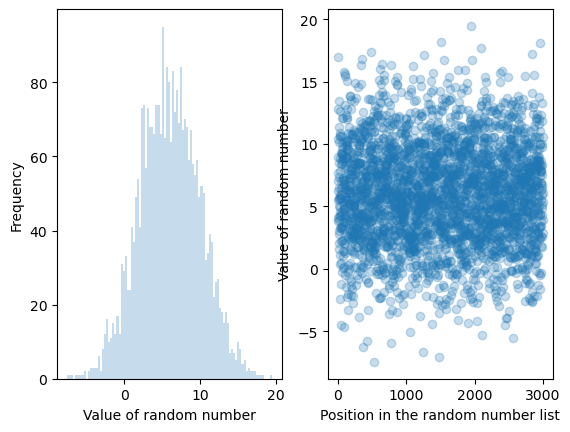

In [4]:
from matplotlib import pyplot as plt

mean = 6
sd = 4
trials = 3000
data = np.random.normal(loc=mean, scale=sd, size=trials)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(data, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(trials), data, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

68% is the number 

In [ ]:
mean = 6
sd = 4
trials = 3000

data = np.random.normal(loc=mean, scale=sd, size=trials)

mask = (data >= mean - sd) & (data <= mean+sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/trials*100:.2f}%')

## 1 Brownian Motion in 1D

### 1.1 The scenario

In [3]:
import numpy.random as rnd

def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

moves = [brown_1d() for x in range(0, 5)]
print(move for move in moves)

<generator object <genexpr> at 0x104d28200>


### 1.2 The simulation

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.9')

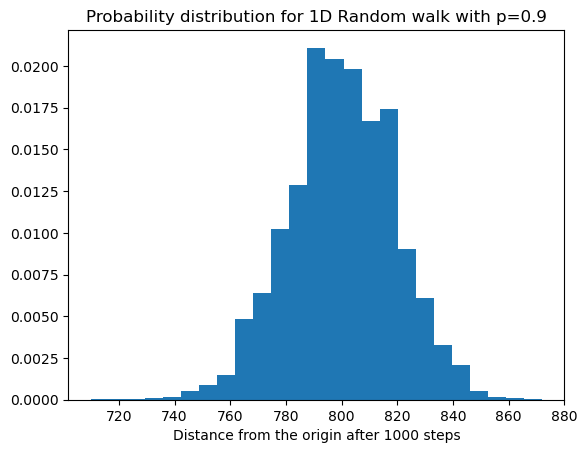

In [16]:
no_of_steps, p = 1_000, 0.9
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

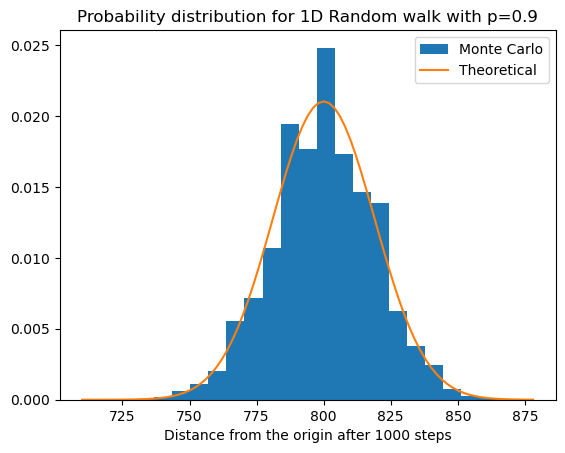

In [32]:
no_of_steps, p = 1000, 0.9
repeats = 10000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

prob_right = p
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
    
plt.hist(results, bins=25, density=True, label="Monte Carlo")
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')
plt.plot(x, normal(x, mean, sd), label='Theoretical')
plt.legend()

## 2 Estimating $\pi$

### 2.1 The method

Consider a circle inscribed on a square surface, as shown above. Let’s take the radius of the circle to be 1. Then, if we throw a large number (
N
t
o
t
a
l
) of grains of sand randomly onto this surface, the number of grains landing on the green, the circular area will be related to the number on the total area by:

N
g
r
e
e
n
N
t
o
t
a
l
≈
Area of green region
Area of square

But we know the formulae for the areas! So,

Area of green region
Area of square
=
π
(
1
)
2
2
×
2
=
1
4
π
⇒
π
=
4
(
Area of green region
Area of square
)

i.e.
π
≈
4
(
N
g
r
e
e
n
N
t
o
t
a
l
)

We can simulate this experiment by randomly ‘creating’ points (to represent where a grain of sand will land) by using NumPy’s PRNG. We can then decide if this grain of sand is inside or outside to get 
N
g
r
e
e
n
 and then go on to get an estimate for 
π
!


### 2.2 A poor but intuitive solution

In [4]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.13668

### 2.3 A better solution

In [5]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.139716

### 2.4 A smarter solution

In [6]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.142512

## Exercise 1 :  Vital Stats of Random π

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

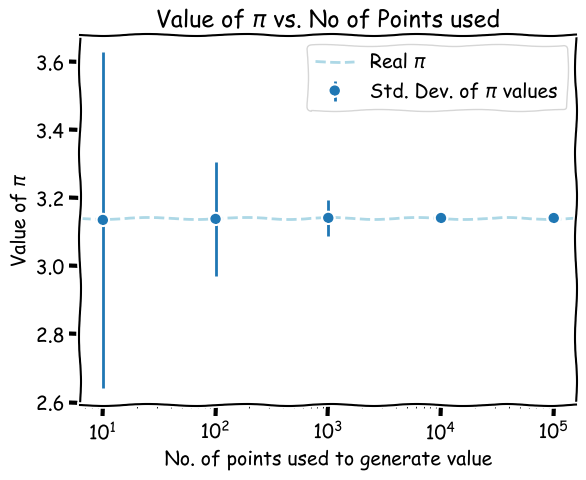

In [29]:
import numpy as np
import numpy.random as rng
from matplotlib import pyplot as plt

def estimate_pi(n):
    '''
    A function for estimating π
    Uses n number of trials
    '''
    x = rng.rand(n)
    y = rng.rand(n)
    in_circle = np.sum((x**2 + y**2) <= 1)
    return 4 * in_circle / n

def collect_data(pi_tries=10000, n=1000):
    '''
    Generate the mean and STD of estimating pi n times
    '''
    data = [estimate_pi(pi_tries) for x in range(n)]
    mean = np.mean(data)
    std = np.std(data)
    return mean, std

def trial_test(r=5):
    '''
    Test the effect of increasing value of r (number of "balls" used in pi estimation)
    '''
    x_values = [10**x for x in range(1,r+1)]
    y_values, y_std = [], []
    for x in x_values:
        mean, std = collect_data(pi_tries=x)
        y_values.append(mean)
        y_std.append(std)
    
    return x_values, y_values, y_std

def plot_trials():
    x_values, y_values, y_std = trial_test()
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    
    ax.axhline(np.pi, ls="--", label="Real $\pi$", color="lightblue")
    ax.plot(x_values, y_values, color="blue", marker="o", ls="")
    ax.errorbar(x_values, y_values, yerr=y_std, fmt="o", label="Std. Dev. of $\pi$ values")
    ax.set_title("Value of $\pi$ vs. No of Points used")
    ax.legend(loc="upper right")
    ax.set_xscale("log")
    ax.set_xlabel("No. of points used to generate value")
    ax.set_ylabel("Value of $\pi$")
    #ax.set_yticks(np.arange(2.9, 3.3+0.1, 0.1))
    #ax.set_ylim(2.85, 3.35)
    
    plt.xkcd()
    plt.show()

plot_trials()